### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

My GitHub repository link: https://github.com/alexs178/LSE_DA_NHS_analysis
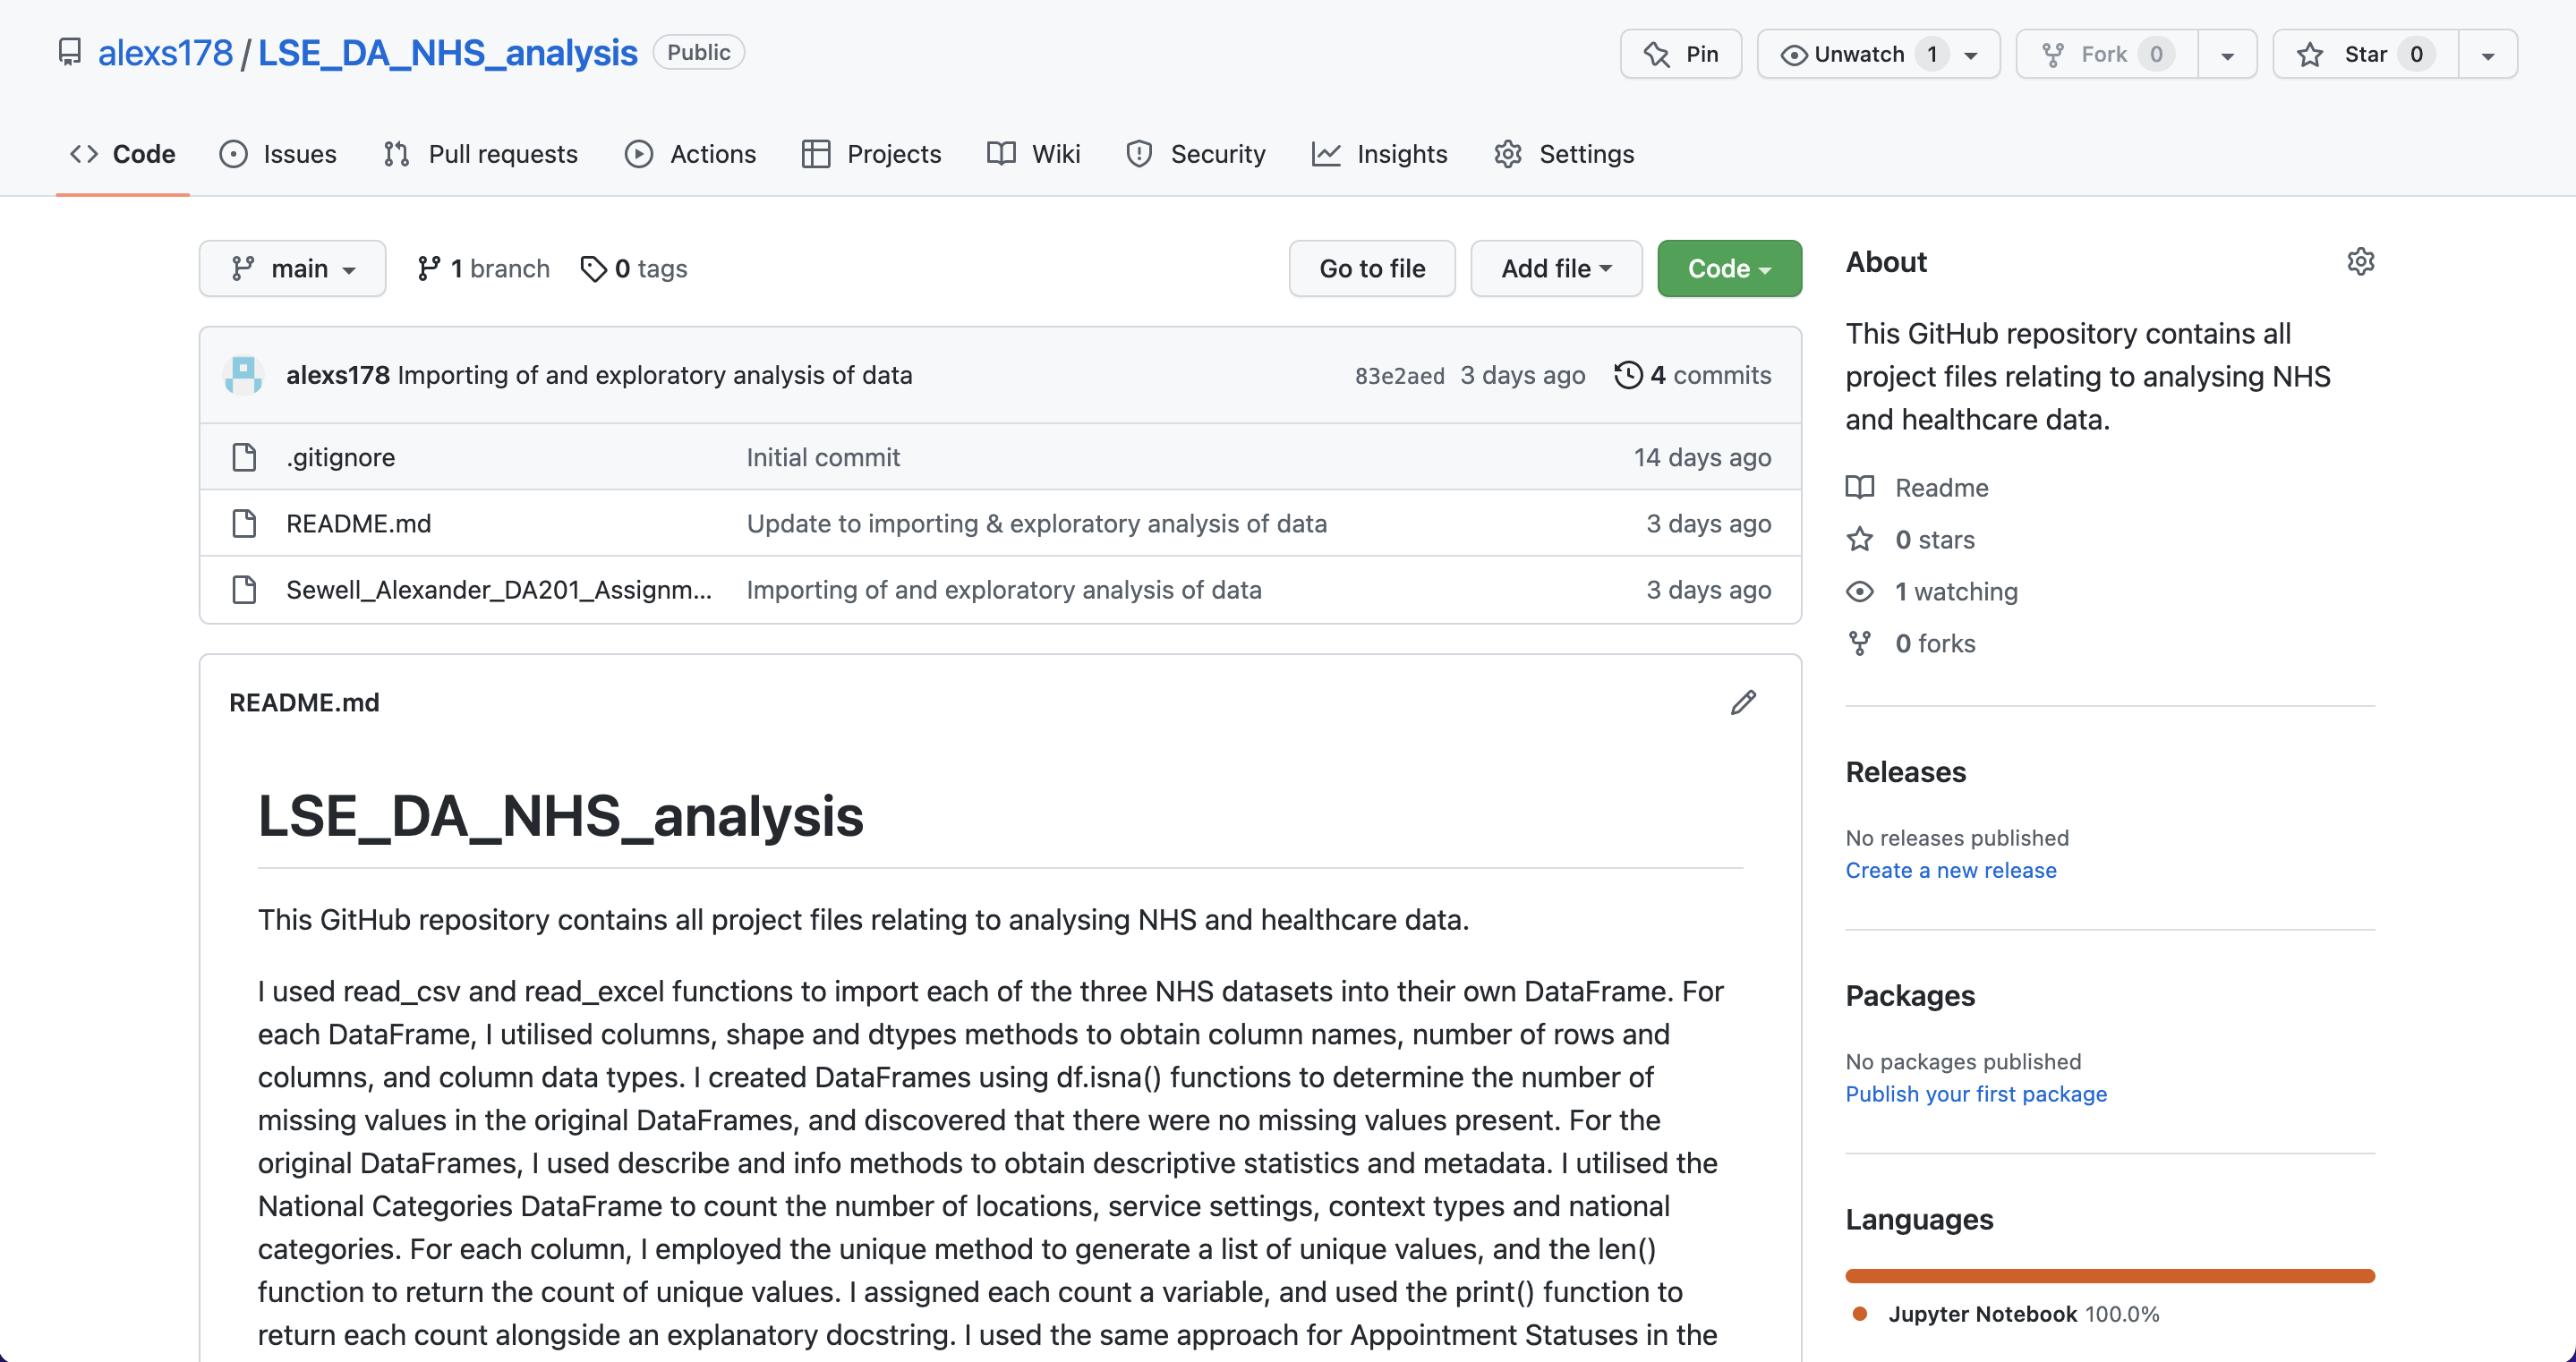

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary Pandas and NumPy libraries using import function and aliases.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the actual_duration.csv data set into a DataFrame as ad using the read_csv() function.
ad = pd.read_csv('actual_duration.csv')

# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(ad.columns)
# View the number of rows and columns using the print() function and shape method.
print(ad.shape)
# View the data types of each column using the print() function and dtypes method.
print(ad.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
ad.head()

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the Actual Duration DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
ad_na = ad[ad.isna().any(axis=1)]
# View how many rows in the Actual Duration DataFrame have missing values by using shape method
ad_na.shape

(0, 8)

This indicates there are no missing values in the Actual Duration DataFrame.

In [4]:
# Determine the metadata of the data set.
# Determine the metadata of the data set by using the info() function:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar using the read_csv() function.
ar = pd.read_csv('appointments_regional.csv')

# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(ar.columns)
# View the number of rows and columns using the print() function and shape method.
print(ar.shape)
# View the data types of each column using the print() function and dtypes method.
print(ar.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
ar.head()

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the Appointments Regional DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
ar_na=ar[ar.isna().any(axis=1)]
# View how many rows in the Appointments Regional DataFrame have missing values by using shape method.
ar_na.shape

(0, 7)

This indicates there are no missing values in the Appointments Regional DataFrame.

In [8]:
# Determine the metadata of the data set by using the info() function:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [9]:
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc using the read_excel() function.
nc = pd.read_excel('national_categories.xlsx')
# To sense-check the data was imported correctly:
# View the column names using the print() function and columns method.
print(nc.columns)
# View the number of rows and columns using the print() function and shape method.
print(nc.shape)
# View the data types of each column using the print() function and dtypes method.
print(nc.dtypes)
# View the first 5 rows of the DataFrame by using the head() function.
nc.head()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# To determine whether there are missing values:
# Create a DataFrame containing all missing values in the National Categories DataFrame by using isna() function.
# Use any(axis=1) parameter to identify missing values in all columns of DataFrame.
nc_na=nc[nc.isna().any(axis=1)]
# View how many rows in the National Categories DataFrame have missing values by using shape method.
nc_na.shape

(0, 8)

This indicates there are no missing values in the National Categories DataFrame.

In [12]:
# Determine the metadata of the data set by using the info() function:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of numerical data in the data set by using the describe() function:
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations:
# Use unique() function to view list of locations, and len() function to count number of locations.
# Assign a variable to this count.
cnt_loc = len(nc['sub_icb_location_name'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of locations: ", cnt_loc)

Count of locations:  106


**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top five locations based on record count:
# Use value_counts() function to generate table that displays number of records per location in descending order.
# Assign a variable to this table.
locations_most_records = nc['sub_icb_location_name'].value_counts()
# Use print() function to generate an appropriate docstring.
print("These are the five locations with the most records in the National Categories data set:")
# Use head() function to return the five locations with the most records.
locations_most_records.head()

These are the five locations with the most records in the National Categories data set:


NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
# Determine the number of service settings: 
# Use unique() function to view list of service settings, and len() function to count number of service settings.
# Assign a variable to this count.
cnt_serv_setting = len(nc['service_setting'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Service Settings: ", cnt_serv_setting)
# Use unique() function to view list of service settings.
nc['service_setting'].unique()

Count of Service Settings:  5


array(['Primary Care Network', 'Other', 'General Practice', 'Unmapped',
       'Extended Access Provision'], dtype=object)

The 5 service settings includes category for unmapped values.

In [17]:
# Determine the number of context types:
# Use unique() function to view list of context types, and len() function to count number of context types.
# Assign a variable to this count.
cnt_context_type = len(nc['context_type'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Context Types: ", cnt_context_type)
# Use unique() function to view list of context types.
nc['context_type'].unique()

Count of Context Types:  3


array(['Care Related Encounter', 'Unmapped', 'Inconsistent Mapping'],
      dtype=object)

The 3 context types include categories for unmapped and inconsistently mapped values.

In [18]:
# Determine the number of national categories:
# Use unique() function to view list of national categories, and len() function to count number of \ 
# national categories. Assign a variable to this count.
cnt_nat_cat = len(nc['national_category'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of National Categories: ", cnt_nat_cat)
# Use unique() function to view list of national categories.
nc['national_category'].unique()

Count of National Categories:  18


array(['Patient contact during Care Home Round', 'Planned Clinics',
       'Home Visit', 'General Consultation Acute',
       'Structured Medication Review', 'Care Home Visit', 'Unmapped',
       'Clinical Triage', 'Planned Clinical Procedure',
       'Inconsistent Mapping',
       'Care Home Needs Assessment & Personalised Care and Support Planning',
       'General Consultation Routine',
       'Service provided by organisation external to the practice',
       'Unplanned Clinical Activity', 'Social Prescribing Service',
       'Non-contractual chargeable work',
       'Group Consultation and Group Education', 'Walk-in'], dtype=object)

The 18 national categories include categories for unmapped and inconsistently mapped values.

In [20]:
# Determine the number of appointment status:
# Use unique() function to view list of appointment statuses, and len() function to count number of \
# appointment statuses. Assign a variable to this count.
cnt_app_status = len(ar['appointment_status'].unique())
# Use print() function to return count alongside an appropriate docstring.
print("Count of Appointment Statuses: ", cnt_app_status)
# Use unique() function to view list of appointment statuses.
ar['appointment_status'].unique()

Count of Appointment Statuses:  3


array(['Attended', 'DNA', 'Unknown'], dtype=object)

The 3 appointment statuses includes category for unknown values.

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [21]:
# Use the dtypes function to view the data type of appointment_date in the ad DataFrame.
print(ad.dtypes)
# View the first five rows of appointment_date for the ad DataFrame to determine the date format by using head().
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


The data type of appointment_date in the ad DataFrame needs to be amended to datetime64[ns].

In [22]:
# Use the dtypes function to view the data type of appointment_date in the nc DataFrame.
print(nc.dtypes)
# View the first five rows of appointment_date for the nc DataFrame to determine the date format by using head().
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


The data type of appointment_date in the nc DataFrame doesn't need to be amended.

In [23]:
# Use the dtypes function to view the data type of appointment_month in the ar DataFrame.
print(ar.dtypes)
# View the first five rows of appointment_month for the ar DataFrame to determine the date format by using head().
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


appointment_month does not contain date information, and so can't be converted to the data type datetime64[ns].

In [24]:
# Change the date format of ad['appointment_date'] to datetime64[ns] by using the astype() function.
ad['appointment_date'] = ad['appointment_date'].astype('datetime64[ns]')

# View the DateFrame's data types to confirm the change worked.
print(ad.dtypes)
# View the DateFrame's first 5 rows to confirm the change worked.
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


The data type of appointment_date in the ad DataFrame was successfully changed to datetime64[ns].

In [25]:
# Use min() and max() functions to calculate the minimum and maximum dates in the ad DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first date an appointment was booked in the ad DataFrame is: ", ad["appointment_date"].min())
print("The last date an appointment was booked in the ad DataFrame is: ", ad["appointment_date"].max())

The first date an appointment was booked in the ad DataFrame is:  2021-12-01 00:00:00
The last date an appointment was booked in the ad DataFrame is:  2022-06-30 00:00:00


In the ad DataFrame, the first date of scheduled appointments is 1st December 2021. 
The last date of scheduled appointments is 30th June 2022.

In [26]:
# Use min() and max() functions to calculate the minimum and maximum dates in the nc DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first date an appointment was booked in the nc DataFrame is: ", nc["appointment_date"].min())
print("The last date an appointment was booked in the nc DataFrame is: ", nc["appointment_date"].max())

The first date an appointment was booked in the nc DataFrame is:  2021-08-01 00:00:00
The last date an appointment was booked in the nc DataFrame is:  2022-06-30 00:00:00


In the nc DataFrame, the first date of scheduled appointments is 1st August 2021. 
The last date of scheduled appointments is 30th June 2022.

In [27]:
# Use min() and max() functions to calculate the first and last appointment_month in the ar DataFrame.
# Use print() functions to return these values alongside explanatory docstrings.
print("The first month an appointment was booked in the ar DataFrame is: ", ar['appointment_month'].min())
print("The last month an appointment was booked in the ar DataFrame is: ", ar['appointment_month'].max())

The first month an appointment was booked in the ar DataFrame is:  2020-01
The last month an appointment was booked in the ar DataFrame is:  2022-06


In the ar DataFrame, the first month of scheduled appointments is January 2020, and the last month is June 2022.

Amongst all 3 data sets, appointments were scheduled between January 2020 and 30th June 2022.

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [28]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Create a subset of the nc DataFrame, using the loc() function to filter the DataFrame on sub_icb_location_name \
# and on appointment_date.
nc_subset = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')
                  & (nc['appointment_date'] >= '2022-01-01')
                  & (nc['appointment_date'] <= '2022-06-01')]
# Use the groupby() and sum() functions to calculate total appointments for each service setting in the subset.
# Use sort_values() function to display output in descending order.
nc_subset.groupby('service_setting')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending = False)

,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


General Practice was the most popular service setting for NHS North West London from 1 January - 1 June 2022.

**Question 3:** Which month had the highest number of appointments?

In [30]:
# Use the ar DataFrame, as this is the only DataFrame which contains all 30 months in the reporting period.
# Use the groupby() and sum() functions to calculate total appointments per month. 
# Use the sort_values() function to arrange the output in descending order.
ar.groupby('appointment_month')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending = False)

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2020-10,28301932
2022-05,27495508
2021-03,27225424
2020-01,27199296
2021-06,26784182


November 2021 had the highest number of appointments.

**Question 4:** What was the total number of records per month?

In [31]:
# Use the value_counts() function to calculate the total number of records per month in the ar DataFrame.
ar['appointment_month'].value_counts()

2020-03    21350
2020-01    20889
2021-11    20766
2020-02    20689
2021-10    20562
2022-03    20532
2021-09    20441
2021-12    20393
2022-05    20276
2022-06    20231
2022-01    20225
2022-02    20133
2020-10    20122
2022-04    20073
2020-09    20043
2021-07    19899
2021-06    19814
2021-08    19786
2020-11    19675
2020-07    19502
2021-04    19452
2020-12    19394
2021-05    19384
2021-03    19369
2021-01    19319
2020-08    19247
2020-04    19124
2021-02    18949
2020-06    18844
2020-05    18338
Name: appointment_month, dtype: int64

In [32]:
# Use the value_counts() function to calculate the total number of records per month in the nc DataFrame.
nc['appointment_month'].value_counts()

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

In [33]:
# The ad DataFrame does not contain appointment_month like the other DataFrames.
# Instead, use the groupby and dt methods to group the DataFrame by month. 
# Then use the count() function to count the number of records per month.
# Use the sort_values() function to sort the output in descending order.
ad.groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month])[['actual_duration']].count() \
.sort_values('actual_duration', ascending = False)

actual_duration
appointment_date appointment_date                 
2022             3                           21236
                 5                           20128
                 1                           19643
2021             12                          19507
2022             6                           19227
                 4                           19078
                 2                           18974

In each DataFrame, the month of March always had the most records (March 2022 for the ad and nc DataFrames,
and March 2020 for the ar DataFrame).

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [34]:
# Import the Seaborn and Matplotlib libraries using import function and aliases.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size using the set() function.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white using the set_style() function.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

Lineplots will be used, as these are effective at visualising changes in values over time.

In [35]:
# Aggregate nc DataFrame on monthly level and service setting and determine the sum of records per month \
# and per service setting by using groupby(), sum() and reset_index() functions.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])[['count_of_appointments']].sum().reset_index()
# Use value_counts() function to determine number of records per appointment_month
print(nc_ss['appointment_month'].value_counts())
# View output.
nc_ss

2021-08    5
2021-09    5
2021-10    5
2021-11    5
2021-12    5
2022-01    5
2022-02    5
2022-03    5
2022-04    5
2022-05    5
2022-06    5
Name: appointment_month, dtype: int64


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


There are 5 records per month, as there are 5 service settings. As there are 11 months in the nc DataFrame, there are 55 records in the above output.

**Service settings:**

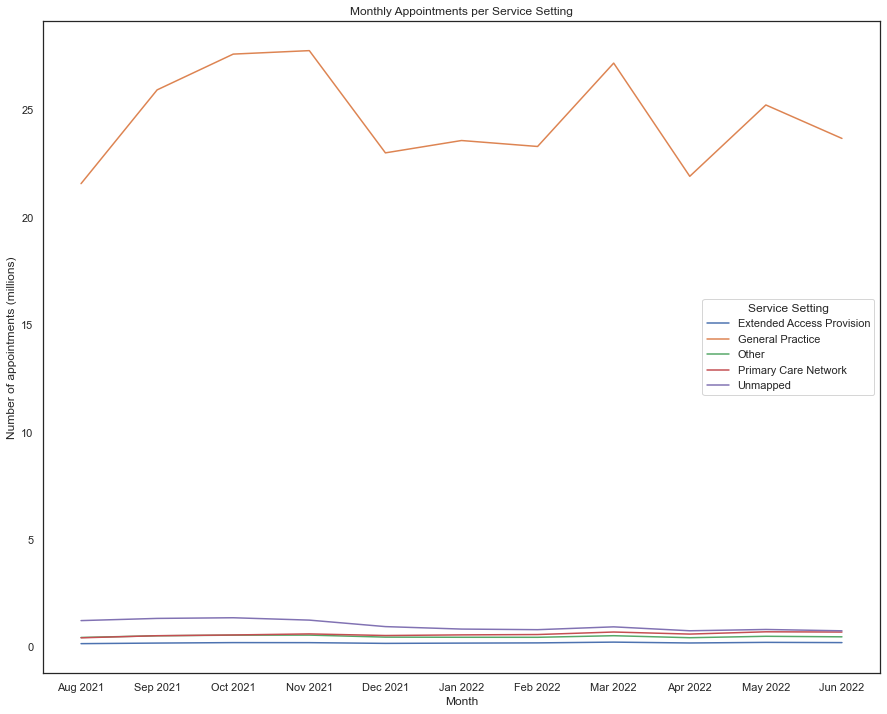

In [36]:
# Use lineplot() function to visualise count_of_appointments per appointment_month. 
# Set hue as service_setting to distinguish between service settings. Data should be the nc subset aggregated \
# on monthly level and service setting. Set confidence interval equal to none. Set variable equal to lineplot.
ans1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting', data = nc_ss, 
                    ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans1.set_title('Monthly Appointments per Service Setting')
ans1.set_xlabel('Month')
ans1.set_ylabel('Number of appointments (millions)')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans1.set_xticks(['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', 
                 '2022-04', '2022-05', '2022-06'])
ans1.set_xticklabels(['Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 
                     'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans1.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000])
ans1.set_yticklabels(['0', '5', '10', '15', '20', '25'])
# Use legend() function to set appropriate title for the legend.
ans1.legend(title = 'Service Setting')
# Use get_figure() function on lineplot variable, then assign output to variable. Use savefig() function on variable \
# to save lineplot.
fig1 = ans1.get_figure()
fig1.savefig('nc_ss.png')

General Practice is clearly the most popular service setting. General Practice Appointments are highest in October 2021, November 2021 & March 2022. General Practice Appointments are lowest in August 2021 & April 2022.

**Context types:**

In [37]:
# Aggregate nc DataFrame on monthly level and context type and determine the sum of records per month \
# and per context type by using groupby(), sum() and reset_index() functions.
nc_ct = nc.groupby(['appointment_month', 'context_type'])[['count_of_appointments']].sum().reset_index()
# Use value_counts() function to determine number of records per appointment_month
print(nc_ct['appointment_month'].value_counts())
# View output.
nc_ct

2021-08    3
2021-09    3
2021-10    3
2021-11    3
2021-12    3
2022-01    3
2022-02    3
2022-03    3
2022-04    3
2022-05    3
2022-06    3
Name: appointment_month, dtype: int64


,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


There are 3 records per month, as there are 3 context types. As there are 11 months in the nc DataFrame, there are 33 records in the above output.

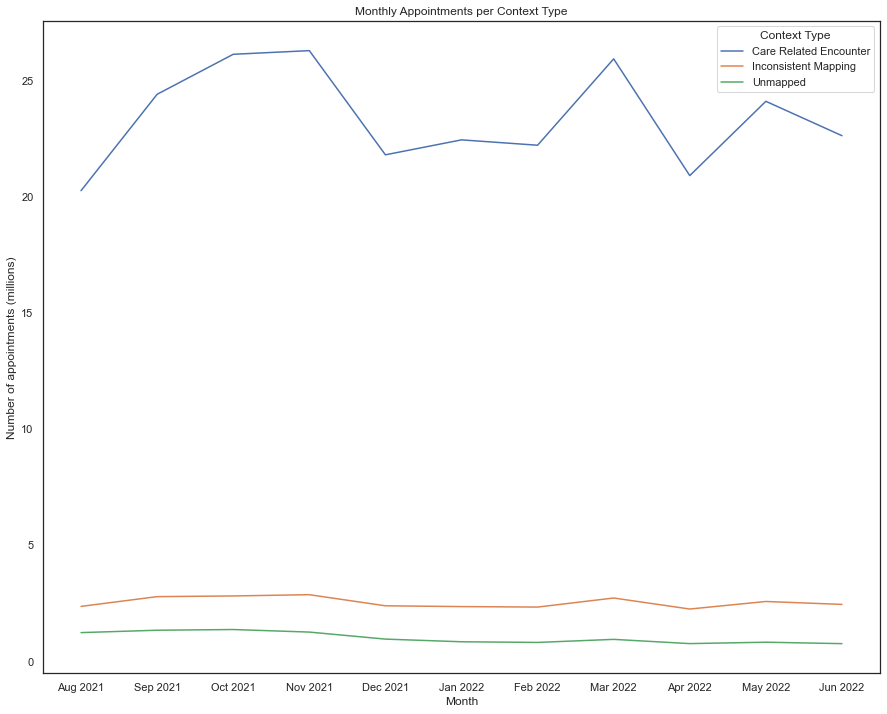

In [38]:
# Use lineplot() function to visualise count_of_appointments per appointment_month. 
# Set hue as context_type to distinguish between context types. Data should be the nc subset aggregated \
# on monthly level and context type. Set confidence interval equal to none. Set variable equal to lineplot.
ans2 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'context_type', data = nc_ct, 
                    ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans2.set_title('Monthly Appointments per Context Type')
ans2.set_xlabel('Month')
ans2.set_ylabel('Number of appointments (millions)')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans2.set_xticks(['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', 
                 '2022-04', '2022-05', '2022-06'])
ans2.set_xticklabels(['Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 
                     'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans2.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000])
ans2.set_yticklabels(['0', '5', '10', '15', '20', '25'])
# Use legend() function to set appropriate title for the legend.
ans2.legend(title = 'Context Type')
# Use get_figure() function on lineplot variable, then assign output to variable. Use savefig() function on variable \
# to save lineplot.
fig2 = ans2.get_figure()
fig2.savefig('nc_ct.png')

Care Related Encounter is clearly the most popular context type. Care Related Encounter Appointments are highest in October 2021, November 2021 & March 2022. Care Related Encounter Appointments are lowest in August 2021 & April 2022.

**National categories:**

In [39]:
# Aggregate nc DataFrame on monthly level and national category and determine the sum of records per month \
# and per national category by using groupby(), sum() and reset_index() functions.
nc_nc = nc.groupby(['appointment_month', 'national_category'])[['count_of_appointments']].sum().reset_index()

# Use value_counts() function to determine number of records per appointment_month
print(nc_nc['appointment_month'].value_counts())
# View output.
nc_nc

2021-08    18
2021-09    18
2021-10    18
2021-11    18
2021-12    18
2022-01    18
2022-02    18
2022-03    18
2022-04    18
2022-05    18
2022-06    18
Name: appointment_month, dtype: int64


,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


There are 18 records per month, as there are 18 national categories. As there are 11 months in the nc DataFrame, there are 198 records in the above output.

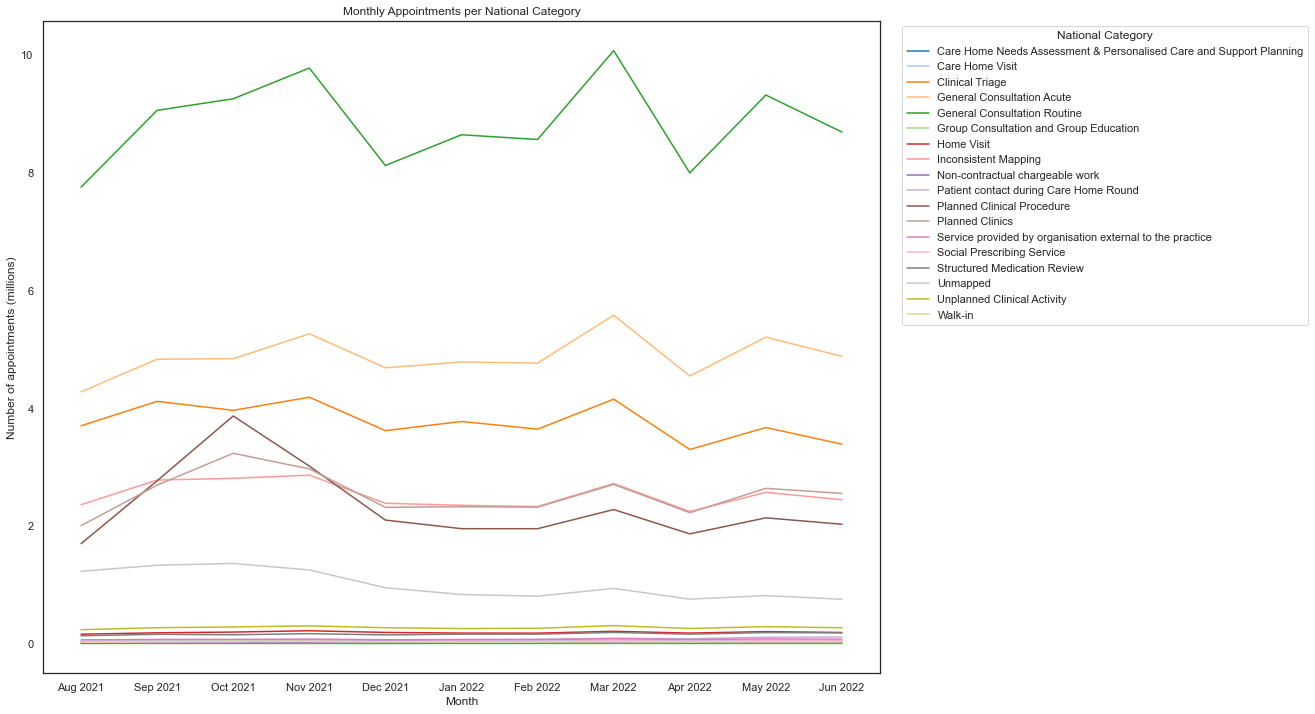

In [40]:
# Use lineplot() function to visualise count_of_appointments per appointment_month. 
# Set hue as national_category to distinguish between national category. Data should be the nc subset aggregated \
# on monthly level and national category. Set confidence interval equal to none. Set variable equal to lineplot.
ans3 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'national_category', data = nc_nc, 
                    palette = 'tab20', ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans3.set_title('Monthly Appointments per National Category')
ans3.set_xlabel('Month')
ans3.set_ylabel('Number of appointments (millions)')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans3.set_xticks(['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', 
                '2022-04', '2022-05', '2022-06'])
ans3.set_xticklabels(['Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 
                     'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans3.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000])
ans3.set_yticklabels(['0', '2', '4', '6', '8', '10'])
# Use legend() function to set appropriate title for the legend. Adjust the bbox_to_anchor and loc parameters \
# to position the legend outside the lineplot so the legend doesn't obscure the lineplot.
ans3.legend(title = 'National Category', bbox_to_anchor = (1.02, 1), loc = 'upper left')
# Take a screenshot of the below lineplot and legend (e.g. on Mac, use Shift+Command+4, and drag cursor \
# over the lineplot and legend)

General Consultation Routine is clearly the most popular national category. General Consultation Routine Appointments are highest in November 2021 & March 2022. General Consultation Routine Appointments are lowest in August 2021 & April 2022.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

Lineplots will be used, as these are effective at visualising changes in values over time.

**Summer (August 2021):**

In [41]:
# Aggregate nc DataFrame on daily level and national category and determine the sum of records per day \
# and per service setting by using groupby(), sum() and reset_index() functions. Also include appointment_month
# in the groupby() function in order to later filter this nc subset by month.
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])[['count_of_appointments']]\
.sum().reset_index()

# View output.
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


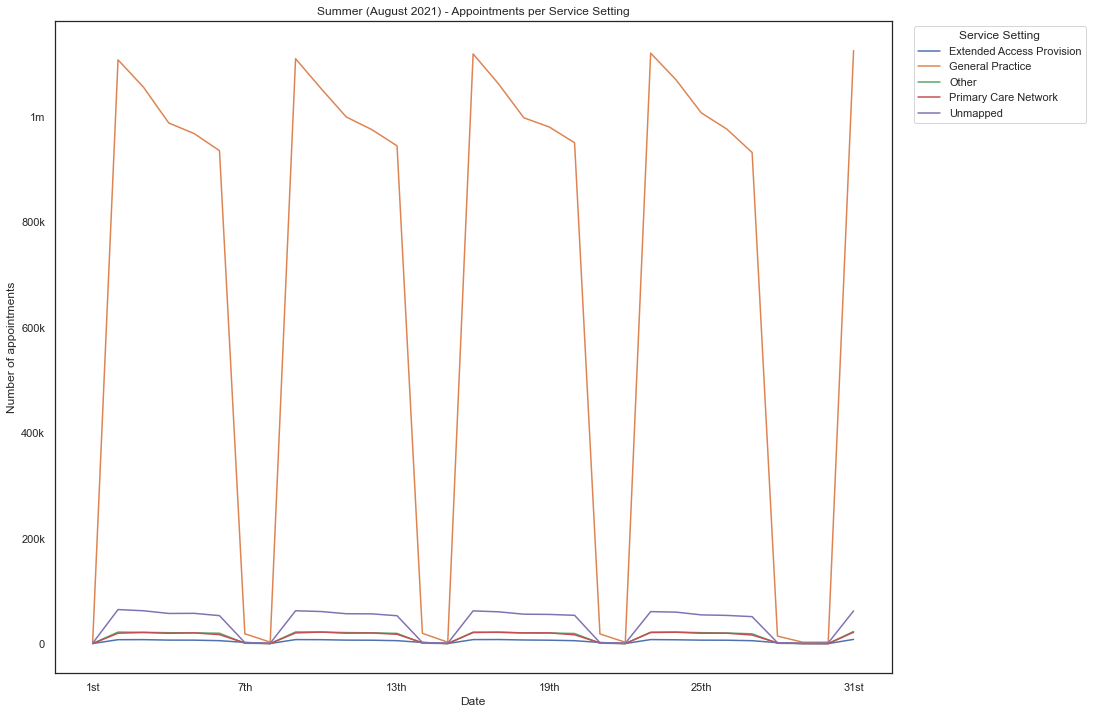

In [42]:
# Use lineplot() function to visualise count_of_appointments per appointment_date. 
# Set hue as service_setting to distinguish between service settings. Data should be the nc subset aggregated \
# on daily level and service setting, filtered on the month of August 2021. Set confidence interval equal to none.
# Set variable equal to lineplot.
ans4 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
            data = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08'], ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans4.set_title('Summer (August 2021) - Appointments per Service Setting')
ans4.set_xlabel('Date')
ans4.set_ylabel('Number of appointments')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans4.set_xticks(['2021-08-01', '2021-08-07', '2021-08-13', '2021-08-19', '2021-08-25', '2021-08-31'])
ans4.set_xticklabels(['1st', '7th', '13th', '19th', '25th', '31st'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans4.set_yticks([0, 200000, 400000, 600000, 800000, 1000000])
ans4.set_yticklabels(['0', '200k', '400k', '600k', '800k', '1m'])
# Use legend() function to set appropriate title for the legend. Adjust the bbox_to_anchor and loc parameters \
# to position the legend outside the lineplot so the legend doesn't obscure the lineplot.
ans4.legend(title = 'Service Setting', bbox_to_anchor = (1.02, 1), loc = 'upper left')
# Take a screenshot of the below lineplot and legend (e.g. on Mac, use Shift+Command+4, and drag cursor \
# over the lineplot and legend)

General Practice is again by far the most popular service setting. General Practice appointments are significantly higher on weekdays than on weekends and bank holidays. In August 2021 (Spring), General Practice appointments fall below 1 million on certain weekdays, unlike the below months which are visualised. This along with my previous findings suggests that NHS demand is lowest in early Summer.

**Autumn (October 2021):**

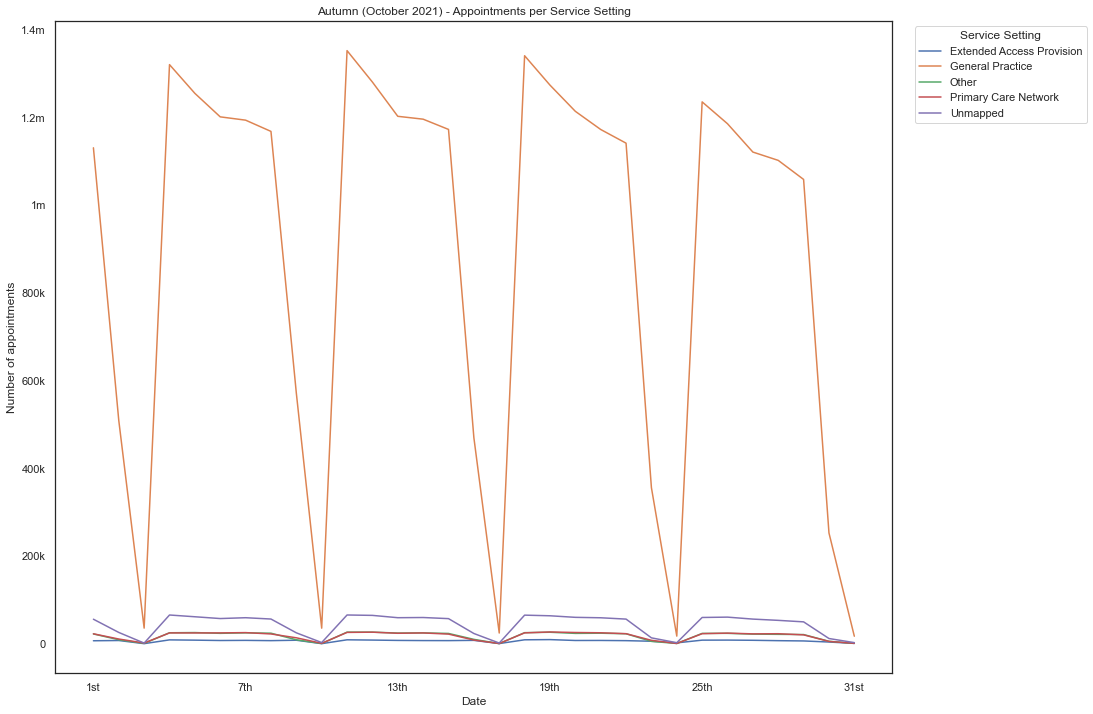

In [43]:
# Use lineplot() function to visualise count_of_appointments per appointment_date. 
# Set hue as service_setting to distinguish between service settings. Data should be the nc subset aggregated \
# on daily level and service setting, filtered on the month of October 2021. Set confidence interval equal to none.
# Set variable equal to lineplot.
ans5 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
            data = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10'], ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans5.set_title('Autumn (October 2021) - Appointments per Service Setting')
ans5.set_xlabel('Date')
ans5.set_ylabel('Number of appointments')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans5.set_xticks(['2021-10-01', '2021-10-07', '2021-10-13', '2021-10-19', '2021-10-25', '2021-10-31'])
ans5.set_xticklabels(['1st', '7th', '13th', '19th', '25th', '31st'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans5.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000])
ans5.set_yticklabels(['0', '200k', '400k', '600k', '800k', '1m', '1.2m', '1.4m'])
# Use legend() function to set appropriate title for the legend. Adjust the bbox_to_anchor and loc parameters \
# to position the legend outside the lineplot so the legend doesn't obscure the lineplot.
ans5.legend(title = 'Service Setting', bbox_to_anchor = (1.02, 1), loc = 'upper left')
# Take a screenshot of the below lineplot and legend (e.g. on Mac, use Shift+Command+4, and drag cursor \
# over the lineplot and legend)

General Practice is again by far the most popular service setting. General Practice appointments are significantly higher on weekdays than on weekends and bank holidays. Saturday General Practice appointments are significantly higher in Autumn (October 2021) than in the other seasons.  Amongst all 4 seasons, the date with the highest number of General Practice appointments can be found in Autumn. This along with my previous findings suggests that NHS demand is highest in early Autumn.

**Winter (January 2022):**

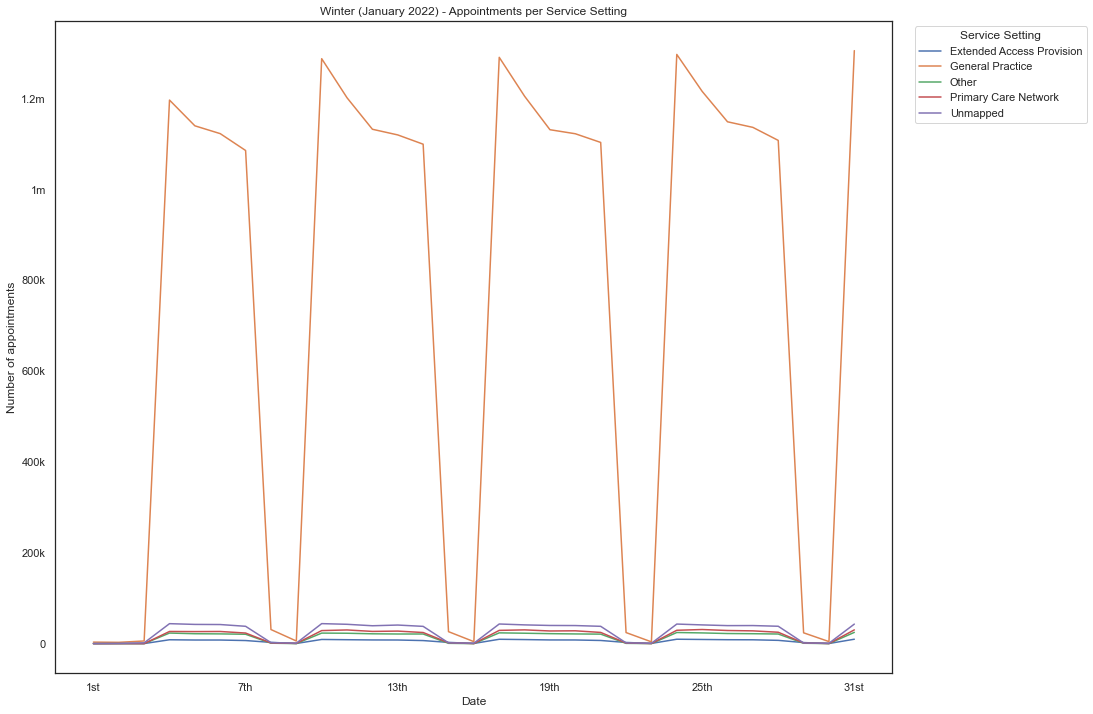

In [44]:
# Use lineplot() function to visualise count_of_appointments per appointment_date. 
# Set hue as service_setting to distinguish between service settings. Data should be the nc subset aggregated \
# on daily level and service setting, filtered on the month of January 2022. Set confidence interval equal to none.
# Set variable equal to lineplot.
ans6 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
            data = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01'], ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans6.set_title('Winter (January 2022) - Appointments per Service Setting')
ans6.set_xlabel('Date')
ans6.set_ylabel('Number of appointments')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans6.set_xticks(['2022-01-01', '2022-01-07', '2022-01-13', '2022-01-19', '2022-01-25', '2022-01-31'])
ans6.set_xticklabels(['1st', '7th', '13th', '19th', '25th', '31st'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans6.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
ans6.set_yticklabels(['0', '200k', '400k', '600k', '800k', '1m', '1.2m'])
# Use legend() function to set appropriate title for the legend. Adjust the bbox_to_anchor and loc parameters \
# to position the legend outside the lineplot so the legend doesn't obscure the lineplot.
ans6.legend(title = 'Service Setting', bbox_to_anchor = (1.02, 1), loc = 'upper left')
# Take a screenshot of the below lineplot and legend (e.g. on Mac, use Shift+Command+4, and drag cursor \
# over the lineplot and legend)

General Practice is again by far the most popular service setting. General Practice appointments are significantly higher on weekdays than on weekends and bank holidays. General Practice appointments appear to be increasing every week as January / the winter season progresses.

**Spring (April 2022):**

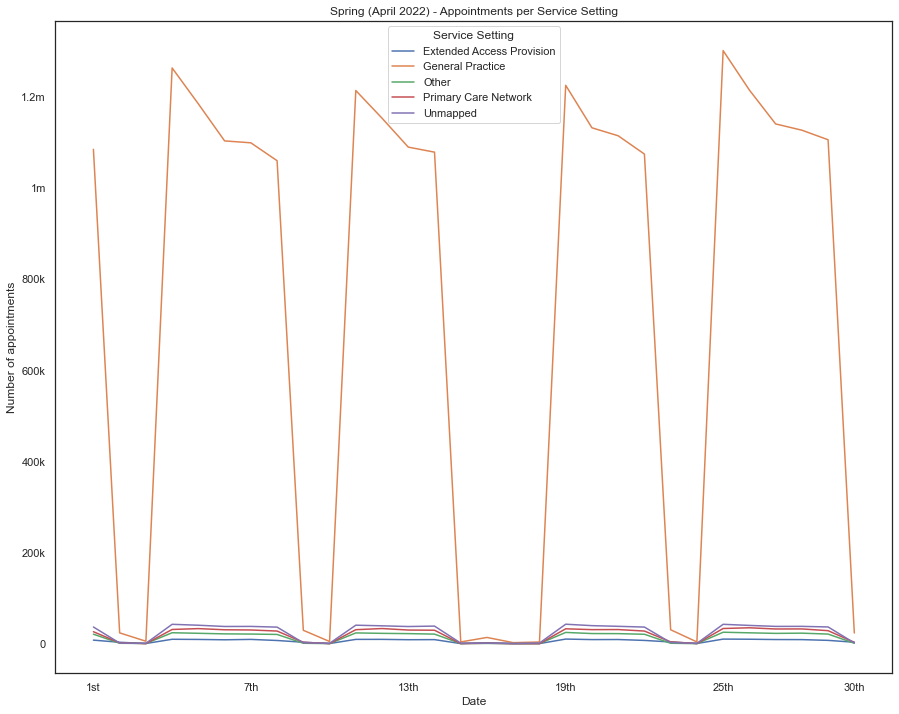

In [45]:
# Use lineplot() function to visualise count_of_appointments per appointment_date. 
# Set hue as service_setting to distinguish between service settings. Data should be the nc subset aggregated \
# on daily level and service setting, filtered on the month of April 2022. Set confidence interval equal to none.
# Set variable equal to lineplot.
ans7 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
            data = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04'], ci = None)
# Use set_title(), set_xlabel() and set_ylabel() functions to properly label the title, x-axis and y-axis.
ans7.set_title('Spring (April 2022) - Appointments per Service Setting')
ans7.set_xlabel('Date')
ans7.set_ylabel('Number of appointments')
# Use set_xticks() and set_xticklabels() functions to apply easy-to-understand major ticks & labels to x-axis.
ans7.set_xticks(['2022-04-01', '2022-04-07', '2022-04-13', '2022-04-19', '2022-04-25', '2022-04-30'])
ans7.set_xticklabels(['1st', '7th', '13th', '19th', '25th', '30th'])
# Use set_yticks() and set_yticklabels() functions to apply easy-to-understand major ticks & labels to y-axis.
ans7.set_yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000])
ans7.set_yticklabels(['0', '200k', '400k', '600k', '800k', '1m', '1.2m'])
# Use legend() function to set appropriate title for the legend.
ans7.legend(title = 'Service Setting')
# Use get_figure() function on lineplot variable, then assign output to variable. Use savefig() function on variable \
# to save lineplot.
fig3 = ans7.get_figure()
fig3.savefig('Spring.png')

General Practice is again by far the most popular service setting. General Practice appointments are significantly higher on weekdays than on weekends and bank holidays. Of the 4 months/seasons visualised, April 2022/Spring has the highest number of bank holidays (2 over 1 long weekend), which causes daily appointments to plummet in the middle of the month. This helps explain why April 2022 contains one of the lowest levels of monthly appointments.

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [1]:
# Import libraries and settings needed for analysis.
# Use import functions and aliases.
import pandas as pd
import seaborn as sns

# Set figure size using set() function.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white using set_style() function.
sns.set_style('white')

# Set Maximum column width to display DataFrames.
pd.options.display.max_colwidth = 200

In [2]:
# Load the tweets data set using read_csv() function.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame by using head() function \
# to verify the tweets data set was correctly imported.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [3]:
# Explore the metadata by using info() function.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [4]:
# Explore the data set by using describe() function.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [5]:
# To determine usefulness of looking at \
# retweeted and favourite tweet messages:
# Use value_counts() functions on the columns \
# 'tweet_retweet_count' & 'tweet_favorite_count' \
# to determine if tweets are notably retweeted or favorited.
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


There are several tweets which were retweeted more than 10 times (e.g. 12 tweets were retweeted 208 times, 14 tweets were retweeted 73 times). Therefore, it could be useful to further analyse the 'tweet_retweet_count' column. By contrast, very few tweets were favorited more than 10 times, so it would not be worthwhile to analyse the 'tweet_favorite_count' column in further detail.

In [6]:
# Create a new DataFrame containing only the text of each tweet.
tweets_text = tweets['tweet_full_text']

# View the DataFrame to check the above operation worked.
tweets_text

0       As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                   RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                                RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4       ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a gr

In [7]:
# Create the variable 'tags' and assign an empty list to 'tags'.
tags = []

# Use a for loop to loop through the tweets to extract \
# and extract all the hashtags from the tweets, and \
# create a list of all hashtags in the tweets.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase and use append() function \
            # to store the list of hashtags in 'tags'.
            tags.append(z.lower())

In [8]:
# Convert the list of hashtags into a Series \
# by using Series() function.
hashtags = pd.Series(tags)
# Use value_counts and head() functions on the hashtags Series \
# to view the top 30 trending hashtags.
hashtags.value_counts().head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [9]:
# Convert the series to a DataFrame in preparation for visualisation:
# Create a dictionary with the keys as 'word' and 'count', \
# and the values as the hashtags Series and the number 1.
dataframe = {'word': hashtags, 'count': 1}
# Use DataFrame() function to convert the dictionary into a DataFrame.
# This will create a DataFrame where each cell in the column 'word' \
# contains a hashtag, and each cell in the column 'count' contains \
# the number 1.
data = pd.DataFrame(dataframe)
# Use head() function to check the hashtags Series was correctly \
# converted into a DataFrame.
data.head()

,word,count
0,#healthcare,1
1,#premisehealth,1
2,#hiring,1
3,#healthcare,1
4,🚨#new:🚨,1


In [10]:
# Use dtypes to check the 'count' datatype.
data.dtypes

word     object
count     int64
dtype: object

The datatype for 'count' is set correctly as integer, so the datatype for 'count' does not need to be amended.

In [11]:
# Display records where the count is larger than 10:
# Use groupby() and sum() functions to create a subset \
# that shows how many times each hashtag was used.
# Use sort_values() function to sort subset from most to least \
# used hashtags.
data_count = data.groupby('word')[['count']].sum().\
sort_values('count', ascending = False).reset_index()
# Create further subset by filtering on 'count' column to view \
# which hashtags were used over 10 times.
data_count_over10 = data_count[data_count['count'] > 10]
# View the hashtags used over 10 times.
data_count_over10

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#marketing,25


Text(0, 0.5, 'Hashtag')

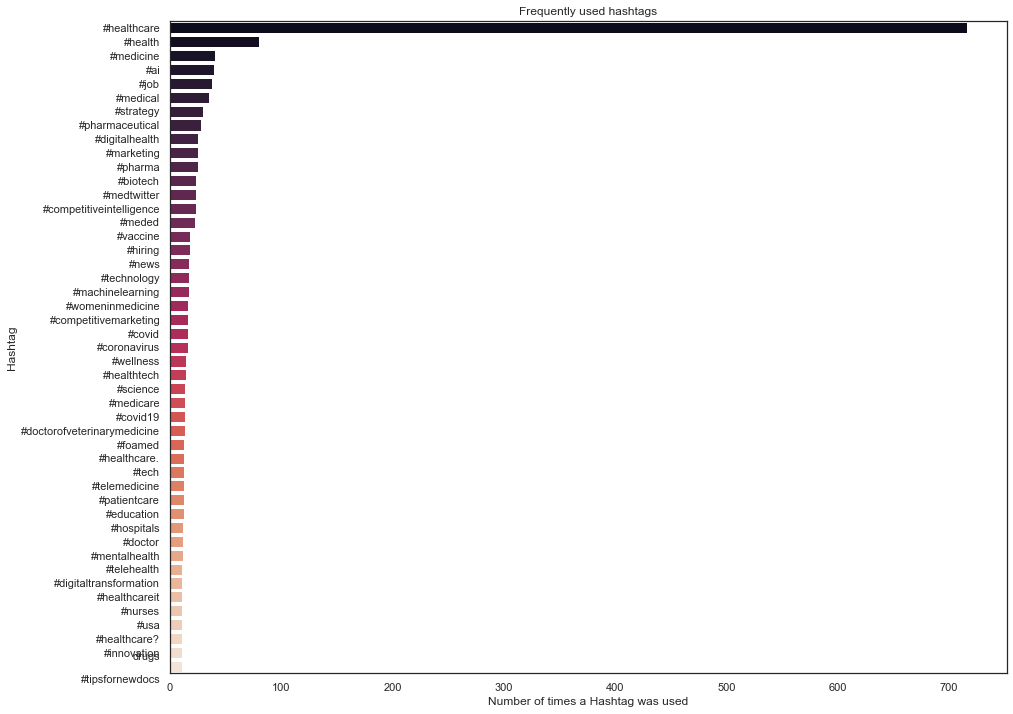

In [12]:
# Create a horizontal barplot using barplot() to display \
# the top trending hashtags (i.e. hashtags used over 10 times).
# Use the sequential 'rocket' colour palette so the 
# the most popular hashtags stand out more with darker colours.
barplot = sns.barplot(x = 'count', y = 'word', 
                      data = data_count_over10, 
                      palette = 'rocket')
# Use set_title(), set_xlabel() and set_ylabel() functions \
# to properly label the title, x-axis and y-axis.
# This will improve the barplot by making it easier to interpret.
barplot.set_title('Frequently used hashtags')
barplot.set_xlabel('Number of times a Hashtag was used')
barplot.set_ylabel('Hashtag')
# Take a screenshot of the below lineplot and legend 
# (e.g. on Mac, use Shift+Command+4, and drag cursor over barplot).

"healthcare" was by far the top trending hashtag, with over 700 utilisations, and "health" was the only other hashtag used over 50 times. The hashtags "hiring" and "job" were amongst the top 20 trending hashtags, which suggests that the NHS is understaffed and looking to resolve this issue. This suggests there is inadequate capacity in the NHS networks, which would mean patients have to wait longer to see Doctors. This could explain patients missing appointments: they become tired of waiting too long to see Doctors who are in short supply, and return home rather than wait any longer.

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.


In [ ]:
# Print the min and max dates.


In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.


# View the DataFrame.


In [ ]:
# Determine the total number of appointments per month.


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


In [ ]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


In [ ]:
# Plot monthly capacity utilisation.


# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.


**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.


**Question 6:** How do the spread of service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


In [1]:
# Create a boxplot to investigate spread of service settings.


In [ ]:
# Create a boxplot to investigate the service settings without GP.


# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.